In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')
X = dataset.iloc[:, 0].values
y = dataset.iloc[:, 1].values
y = np.array(y).reshape(-1,1)
dataset.head(5)

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

c:\users\iars\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [6]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,77.634183,84.774102
1,62.124571,54.912634
2,69.510503,73.654366
3,82.478847,79.385268
4,95.244153,89.868257
5,95.455053,82.747285
6,69.899682,52.599112
7,55.231661,55.363717
8,76.617341,61.017303
9,73.687564,63.436651


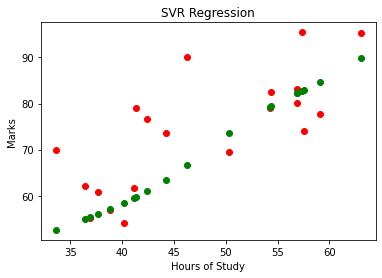

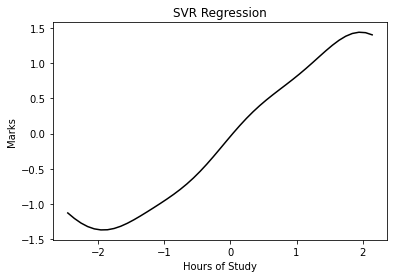

In [7]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X_test), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('SVR Regression')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()